# Lead Scoring Case Study

## -------------------------------------------


### Group
    

- Sheela Bhatia  (sheela.k1@gmail.com)
- Sharath Menon  (sharath92@gmail.com)


## Importing Data

In [488]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [489]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [490]:
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Check

In [491]:
#checking duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [492]:
data.shape

(9240, 37)

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Data Cleaning

In [494]:
## Before cleaning the data, lets convert the column value 'Select' with NaN since, the user has not selected any drop-down option.

data = data.replace('Select', np.nan)
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [495]:
# Checking null values
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [496]:
# Checking for percentage nulls
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [497]:
data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [498]:
# Checking row-wise nulls
data.isnull().sum(axis=1)

0       5
1       5
2       1
3       1
4       2
5       9
6       0
7       9
8       6
9       5
10      2
11      3
12      2
13      3
14      5
15      4
16      9
17      4
18      3
19      4
20      1
21      3
22      0
23      1
24      1
25      1
26      1
27      0
28      4
29      1
       ..
9210    0
9211    0
9212    1
9213    6
9214    8
9215    6
9216    1
9217    4
9218    5
9219    1
9220    2
9221    6
9222    0
9223    1
9224    1
9225    1
9226    5
9227    0
9228    6
9229    1
9230    1
9231    0
9232    1
9233    9
9234    1
9235    1
9236    1
9237    1
9238    5
9239    1
Length: 9240, dtype: int64

In [499]:
# Dropping colummns with more than 70% nulls
data = data.drop('How did you hear about X Education', axis=1)
data = data.drop('Lead Profile', axis=1)
data = data.drop('Specialization', axis=1)
data = data.drop('What is your current occupation', axis=1)
data = data.drop('What matters most to you in choosing a course', axis=1)
data = data.drop('Tags', axis=1)
data = data.drop('Lead Quality', axis=1)
data = data.drop('City', axis=1)
data = data.drop('Asymmetrique Activity Index', axis=1)
data = data.drop('Asymmetrique Profile Index', axis=1)
data = data.drop('Asymmetrique Activity Score', axis=1)
data = data.drop('Asymmetrique Profile Score', axis=1)

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00


In [500]:
data = data.drop('Country', axis=1)

In [501]:
data.shape

(9240, 24)

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9204 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9103 non-null float64
Last Activity                               9137 non-null object
Search                                      9240 non-null object
Magazine                                    9240 non-null object
Newspaper Article                           9240 

In [503]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [504]:
data.dropna(inplace = True)

In [505]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [506]:
#Prospect Id is a metadata field which gives us no relevant data
#Similarly Prospect ID doesnt give any relevant data
data.drop(['Prospect ID'], axis = 1, inplace = True)
data.drop(['Lead Number'], axis = 1, inplace = True)

data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,...,No,No,No,No,No,No,No,No,No,Modified


In [507]:
data_original = data.copy()
data_original.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,...,No,No,No,No,No,No,No,No,No,Modified


In [384]:
#data = data_original 

## Initial Observations

#### 1) Lead Origin

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

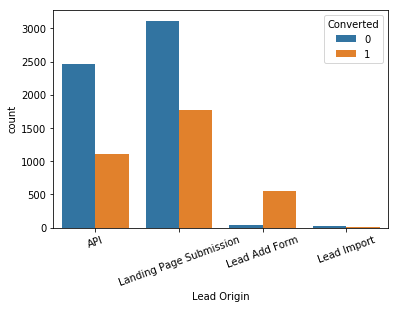

In [508]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data_original)
xticks(rotation = 20)

#### High conversion rate for whichever Lead origin was Lead Add Form but count is less
#### High count of conversion  for whichever Lead origin was Lead Add Form but conversion rate is less

#### 2)Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

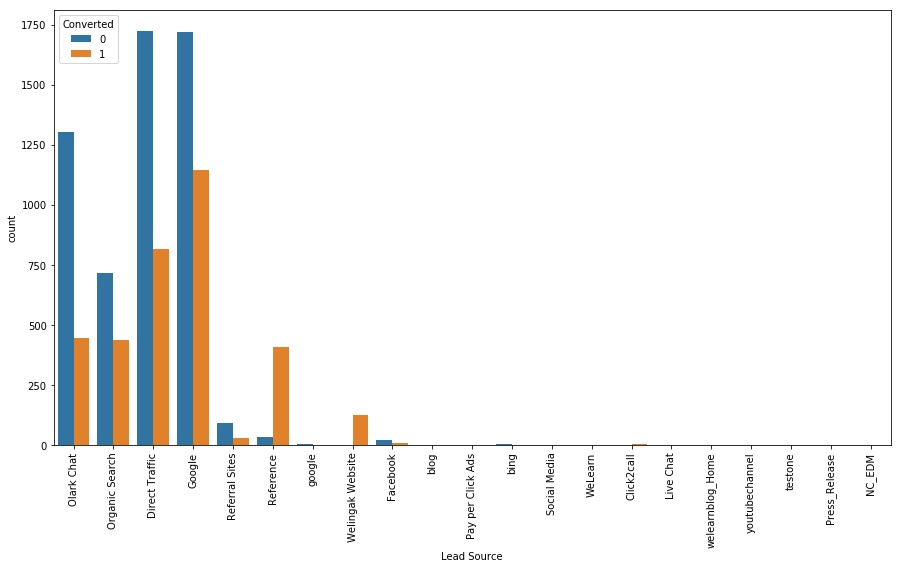

In [509]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = data_original)
xticks(rotation = 90)

In [510]:
#there are 2 values of google which is clearly a data cleaning issue. Therefore we will replace one with other
data_original['Lead Source'] = data_original['Lead Source'].replace(['google'], 'Google')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

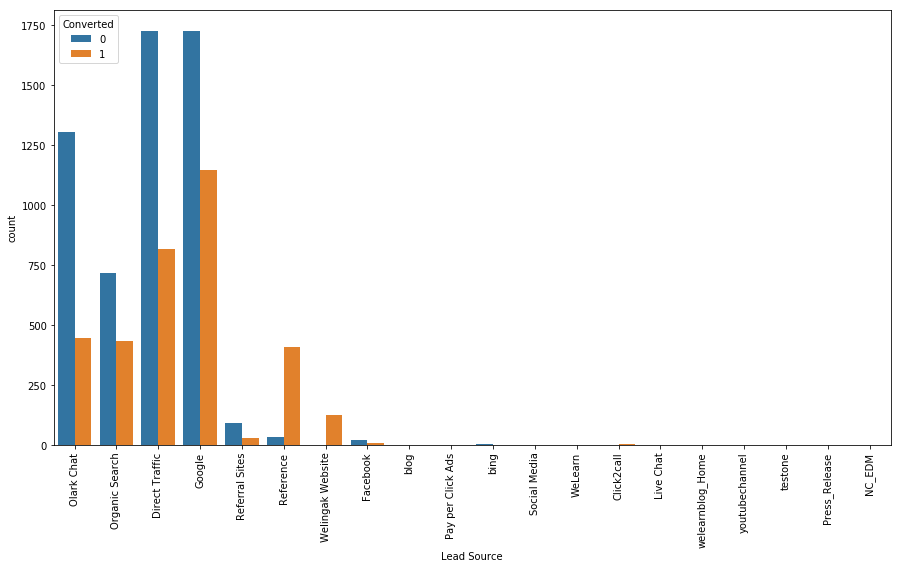

In [511]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = data_original)
xticks(rotation = 90)

#### High conversion rate for whichever Lead source was Reference but count is less
#### High count of conversion for whichever Lead source was Google but conversion rate is less

#### 3) Digital Advertisement and Search

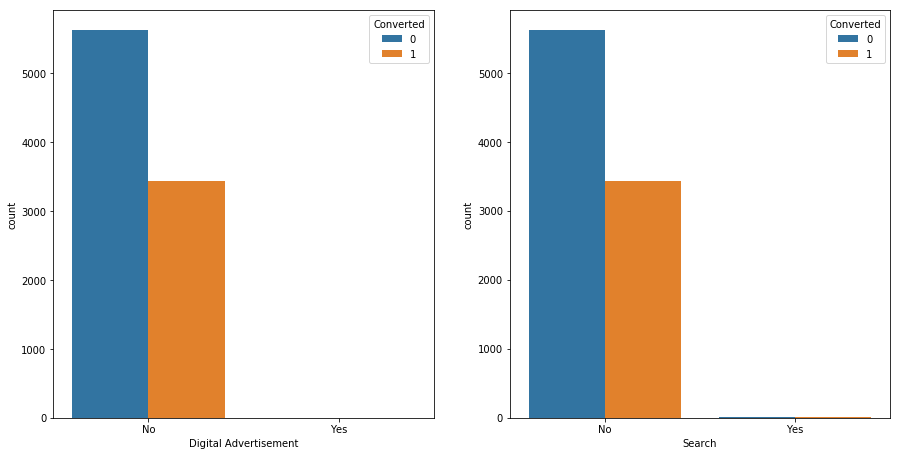

In [512]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = data_original, ax = axs[0])
sns.countplot(x = "Search", hue = "Converted", data = data, ax = axs[1])

#### Both Digital Advertisment and Search do not significantly contribute to conversion rate

#### 4) Total Time Spent

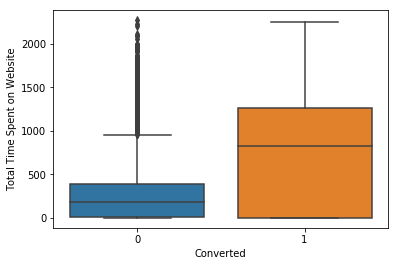

In [513]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data_original)

#### Clearly those who spend more time end up getting converted

#### 5) Total Visits

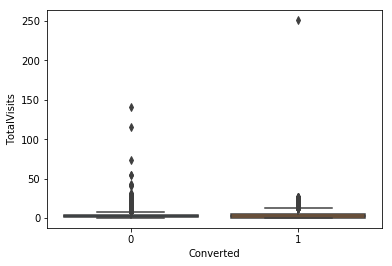

In [514]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

#### No clear distinction can be made here

In [515]:
data = data_original

In [516]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,...,No,No,No,No,No,No,No,No,No,Modified


In [517]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Magazine', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})




In [518]:
# Applying the function to the categorical variable list to make it numerical
data[varlist] = data[varlist].apply(binary_map)

In [519]:

data['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [520]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null int64
Do Not Call                                 9074 non-null int64
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Search                                      9074 non-null int64
Magazine                                    9074 non-null int64
Newspaper Article                           9074 non-null int64
X Education Forums                          9074 non-null int64
Newspaper                                   9074 non-n

#### There are many columns with same data across the column

In [521]:
data['Newspaper'].value_counts()

0    9073
1       1
Name: Newspaper, dtype: int64

In [522]:
data['Receive More Updates About Our Courses'].value_counts()

0    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [523]:
data['Update me on Supply Chain Content'].value_counts()

0    9074
Name: Update me on Supply Chain Content, dtype: int64

In [524]:
data['Get updates on DM Content'].value_counts()

0    9074
Name: Get updates on DM Content, dtype: int64

In [525]:
data['I agree to pay the amount through cheque'].value_counts()

0    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [526]:
#As we can see,the data in these columns have the same value throughout. Therefore they are not going to provide anything to our analysis and we are dropping them.
fields_tobedropped1 = ['Newspaper','Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
data.drop(fields_tobedropped1, axis=1, inplace=True)

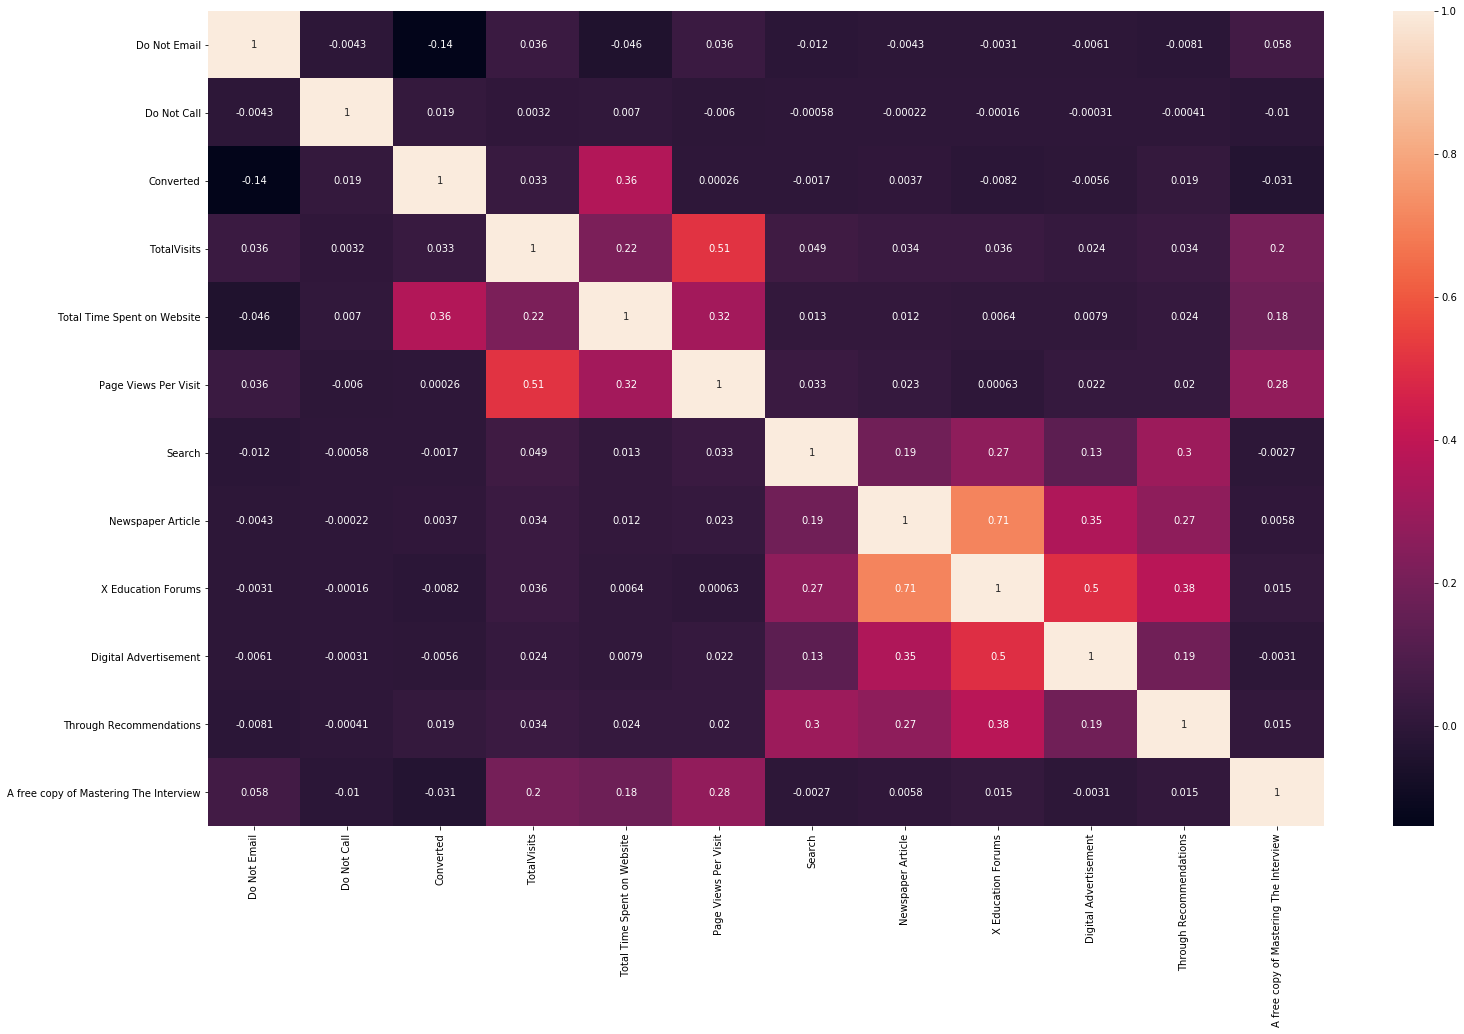

In [527]:
plt.figure(figsize = (25,15))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

Newspaper Article and X Education Forums show high correlation. For now, we will make RFE take care of this.

### Creating Dummy columns to convert categorical into numerical

In [528]:
data = pd.get_dummies(data)
data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [529]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 69 columns):
Do Not Email                                          9074 non-null int64
Do Not Call                                           9074 non-null int64
Converted                                             9074 non-null int64
TotalVisits                                           9074 non-null float64
Total Time Spent on Website                           9074 non-null int64
Page Views Per Visit                                  9074 non-null float64
Search                                                9074 non-null int64
Newspaper Article                                     9074 non-null int64
X Education Forums                                    9074 non-null int64
Digital Advertisement                                 9074 non-null int64
Through Recommendations                               9074 non-null int64
A free copy of Mastering The Interview                9074 non-null int64
L

In [530]:
data.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.000220,0.000110,0.000441,...,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.014845,0.010498,0.020992,...,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.010498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [531]:
#Backup
data_original_1 = data

### Checking for outliers in the continuous variables

In [532]:
# Checking for outliers in the continuous variables
num_data = data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [533]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .99, .999])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


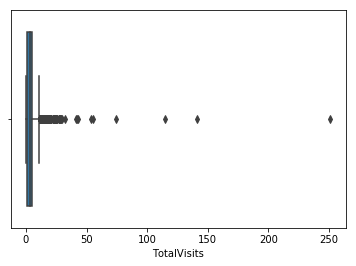

In [534]:
sns.boxplot(data['TotalVisits'])

In [535]:
data['TotalVisits'].sort_values(ascending = False).head(10)

6102    251.0
2322    141.0
5608    115.0
5283     74.0
2190     55.0
5538     54.0
1160     43.0
8230     42.0
5530     41.0
6580     32.0
Name: TotalVisits, dtype: float64

In [536]:
#There are some very high values at the top of the list
percentiles = data['TotalVisits'].quantile([0.001,0.999]).values
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

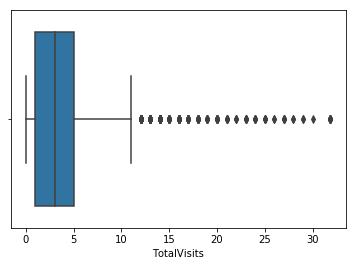

In [537]:
sns.boxplot(data['TotalVisits'])

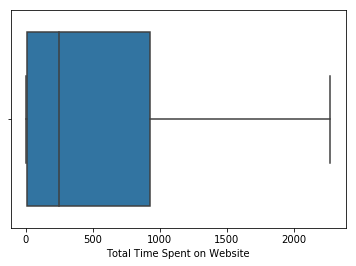

In [538]:
sns.boxplot(data['Total Time Spent on Website'])

There seems to be no outliers in the this column data.

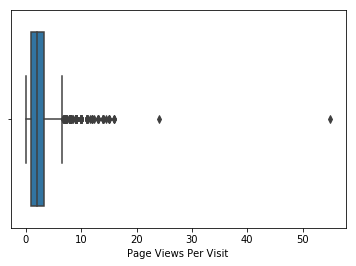

In [539]:
sns.boxplot(data['Page Views Per Visit'])

In [540]:
data['Page Views Per Visit'].sort_values(ascending = False).head(10)

2190    55.0
6805    24.0
125     16.0
5495    16.0
5164    16.0
8640    15.0
4518    15.0
387     15.0
5915    15.0
8001    14.5
Name: Page Views Per Visit, dtype: float64

In [541]:
#There are some very high values at the top of the list
percentiles = data['Page Views Per Visit'].quantile([0.001,0.999]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

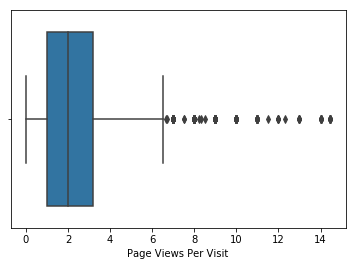

In [542]:
sns.boxplot(data['Page Views Per Visit'])

In [543]:
#Backup
data_original_after_preparation = data

## Model Preparation

In [544]:
from sklearn.model_selection import train_test_split

In [545]:
X = data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [546]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [547]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Data Scaling

In [548]:
from sklearn.preprocessing import StandardScaler

In [549]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.398860,-0.160255,-0.180024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.398860,-0.540048,-0.180024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.966625,-0.888650,-1.140730,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.398860,1.643304,-0.180024,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.452788,2.017593,0.060152,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [550]:
### Checking the Conversion Rate
converted = (sum(data['Converted'])/len(data['Converted'].index))*100
converted

37.85541106458012

In [551]:
import statsmodels.api as sm

In [552]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6289
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        23:13:03   Pearson chi2:                 7.09e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               2.334e+14   1.43e+07   1.63e+07      0.000    2.33e+14    2.33e+14
Do Not Email                                       -1.807e+15   4.42e+06  -4.09e+08      0.000   -1.81e+15   -1.81e+15
Do Not Call                                         3.347e+15   4.76e+07   7.04e+07      0.000    3.35e+15    3.35e+15
TotalVisits                                         1.871e+14   1.24e+06   1.51e+08      0.000    1.87e+14    1.87e+14
Total Time Spent on Website                        -9.961e+12   9.71e+05  -1.03e+07      0.000   -9.96e+12   -9.96e+12
Page Views Per Visit                               -1.048e+14   1.36e+06  -7.68e+07      0.000   -1.05e+14   -1.05e+14
Search                                              9.372e+13   2.38e+07   3.93e+06      0.000    9.37e+13    9.37e+13
Newspaper Article                                    5.16e+15   6.73e+07   7.67e+07      0.000    5.16e+15    5.16e+15
X Education Forums                                  -2.48e+16   1.12e+08   -2.2e+08      0.000   -2.48e+16   -2.48e+16
Digital Advertisement                               1.138e+14   4.76e+07   2.39e+06      0.000    1.14e+14    1.14e+14
Through Recommendations                             1.414e+15   3.56e+07   3.97e+07      0.000    1.41e+15    1.41e+15
A free copy of Mastering The Interview             -1.967e+14   2.62e+06  -7.51e+07      0.000   -1.97e+14   -1.97e+14
Lead Origin_API                                    -2.026e+14    1.9e+07  -1.07e+07      0.000   -2.03e+14   -2.03e+14
Lead Origin_Landing Page Submission                -4.544e+13    1.9e+07   -2.4e+06      0.000   -4.54e+13   -4.54e+13
Lead Origin_Lead Add Form                           7.876e+14    3.9e+07   2.02e+07      0.000    7.88e+14    7.88e+14
Lead Origin_Lead Import                            -3.063e+14   5.51e+07  -5.56e+06      0.000   -3.06e+14   -3.06e+14
Lead Source_Click2call                              1.862e+15   5.37e+07   3.47e+07      0.000    1.86e+15    1.86e+15
Lead Source_Direct Traffic                          1.837e+14    1.5e+07   1.23e+07      0.000    1.84e+14    1.84e+14
Lead Source_Facebook                               -8.117e+14   6.47e+07  -1.25e+07      0.000   -8.12e+14   -8.12e+14
Lead Source_Google                                  3.136e+14   1.49e+07   2.11e+07      0.000    3.14e+14    3.14e+14
Lead Source_Live Chat                               2.986e+15   5.97e+07   5.01e+07      0.000    2.99e+15    2.99e+15
Lead Source_NC_EDM                                  9.175e+15   6.54e+07    1.4e+08      0.000    9.17e+15    9.17e+15
Lead Source_Olark Chat                              8.051e+14    1.5e+07   5.37e+07      0.000    8.05e+14    8.05e+14
Lead Source_Organic Search                          3.606e+14    1.5

In [553]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [554]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [555]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False])

In [556]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 40),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 45),
 ('Search', False, 49),
 ('Newspaper Article', False, 41),
 ('X Education Forums', False, 33),
 ('Digital Advertisement', False, 39),
 ('Through Recommendations', False, 21),
 ('A free copy of Mastering The Interview', False, 52),
 ('Lead Origin_API', False, 3),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Click2call', False, 34),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 12),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', Tru

In [557]:

col = X_train.columns[rfe.support_]

In [558]:
#Removing other columns
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Click2call',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
   

### Model 1

In [559]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.5
Date:                Mon, 10 Jun 2019   Deviance:                       5707.0
Time:                        23:13:39   Pearson chi2:                 6.34e+03
No. Iterations:                    21   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5709      0.064      8.958      0.000       0.446       0.696
Do Not Email                                     -1.6174      0.187     -8.631      0.000      -1.985      -1.250
Total Time Spent on Website                       0.9533      0.034     27.892      0.000       0.886       1.020
Lead Origin_Lead Add Form                         1.8934      0.903      2.096      0.036       0.123       3.664
Lead Source_Reference                             1.9815      0.927      2.136      0.033       0.164       3.799
Lead Source_Welingak Website                      3.5468      1.158      3.064      0.002       1.278       5.816
Last Activity_Approached upfront                 23.3392   1.71e+04      0.001      0.999   -3.35e+04    3.35e+04
Last Activity_Converted to Lead                  -1.0900      0.211     -5.168      0.000      -1.503      -0.677
Last Activity_Email Bounced                      -1.2407      0.413     -3.006      0.003      -2.050      -0.432
Last Activity_Had a Phone Conversation            1.5958      0.765      2.087      0.037       0.097       3.095
Last Activity_Olark Chat Conversation            -0.9187      0.184     -4.983      0.000      -1.280      -0.557
Last Notable Activity_Email Link Clicked         -1.7420      0.248     -7.027      0.000      -2.228      -1.256
Last Notable Activity_Email Opened               -1.3748      0.084    -16.425      0.000      -1.539      -1.211
Last Notable Activity_Modified                   -1.7822      0.096    -18.592      0.000      -1.970      -1.594
Last Notable Activity_Olark Chat Conversation    -1.4878      0.358     -4.161      0.000      -2.189      -0.787
Last Notable Activity_Page Visited on Website    -1.7185      0.187     -9.174      0.000      -2.086      -1.351
=================================================================================================================
"""

In [560]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.277546
1012    0.057213
9226    0.113208
4750    0.894498
7987    0.670886
1281    0.809210
2880    0.161913
4971    0.915746
7536    0.859201
1248    0.636458
dtype: float64

In [561]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27754619, 0.05721251, 0.11320779, 0.89449804, 0.67088572,
       0.8092105 , 0.16191287, 0.91574622, 0.85920057, 0.63645758])

In [562]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.277546,3009
1,0,0.057213,1012
2,0,0.113208,9226
3,1,0.894498,4750
4,1,0.670886,7987


#### From the above table, we can see that values of conversion probability is matching with actual Converted data

In [563]:
from sklearn import metrics

In [564]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [565]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.5
Date:                Mon, 10 Jun 2019   Deviance:                       5707.0
Time:                        23:13:54   Pearson chi2:                 6.34e+03
No. Iterations:                    21   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5709      0.064      8.958      0.000       0.446       0.696
Do Not Email                                     -1.6174      0.187     -8.631      0.000      -1.985      -1.250
Total Time Spent on Website                       0.9533      0.034     27.892      0.000       0.886       1.020
Lead Origin_Lead Add Form                         1.8934      0.903      2.096      0.036       0.123       3.664
Lead Source_Reference                             1.9815      0.927      2.136      0.033       0.164       3.799
Lead Source_Welingak Website                      3.5468      1.158      3.064      0.002       1.278       5.816
Last Activity_Approached upfront                 23.3392   1.71e+04      0.001      0.999   -3.35e+04    3.35e+04
Last Activity_Converted to Lead                  -1.0900      0.211     -5.168      0.000      -1.503      -0.677
Last Activity_Email Bounced                      -1.2407      0.413     -3.006      0.003      -2.050      -0.432
Last Activity_Had a Phone Conversation            1.5958      0.765      2.087      0.037       0.097       3.095
Last Activity_Olark Chat Conversation            -0.9187      0.184     -4.983      0.000      -1.280      -0.557
Last Notable Activity_Email Link Clicked         -1.7420      0.248     -7.027      0.000      -2.228      -1.256
Last Notable Activity_Email Opened               -1.3748      0.084    -16.425      0.000      -1.539      -1.211
Last Notable Activity_Modified                   -1.7822      0.096    -18.592      0.000      -1.970      -1.594
Last Notable Activity_Olark Chat Conversation    -1.4878      0.358     -4.161      0.000      -2.189      -0.787
Last Notable Activity_Page Visited on Website    -1.7185      0.187     -9.174      0.000      -2.086      -1.351
=================================================================================================================
"""

#### Here we can see that Last Activity_Approached upfront has p value of 0.9 which shows that it is insignificant

In [566]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.38
3,Lead Source_Reference,47.90
4,Lead Source_Welingak Website,15.44
12,Last Notable Activity_Modified,1.82
9,Last Activity_Olark Chat Conversation,1.79
0,Do Not Email,1.78
7,Last Activity_Email Bounced,1.75
13,Last Notable Activity_Olark Chat Conversation,1.32
6,Last Activity_Converted to Lead,1.23
1,Total Time Spent on Website,1.08


In [567]:
#Dropping Last Activity_Approached upfront as it is insignificant
col = col.drop('Last Activity_Approached upfront', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### Model 2

In [568]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.0
Date:                Mon, 10 Jun 2019   Deviance:                       5718.0
Time:                        23:14:10   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5718      0.064      8.973      0.000       0.447       0.697
Do Not Email                                     -1.6204      0.187     -8.654      0.000      -1.987      -1.253
Total Time Spent on Website                       0.9522      0.034     27.897      0.000       0.885       1.019
Lead Origin_Lead Add Form                         1.8887      0.903      2.092      0.036       0.119       3.659
Lead Source_Reference                             1.9795      0.927      2.135      0.033       0.162       3.797
Lead Source_Welingak Website                      3.5452      1.157      3.063      0.002       1.277       5.814
Last Activity_Converted to Lead                  -1.1036      0.211     -5.236      0.000      -1.517      -0.691
Last Activity_Email Bounced                      -1.2443      0.413     -3.016      0.003      -2.053      -0.436
Last Activity_Had a Phone Conversation            1.5890      0.764      2.080      0.038       0.092       3.086
Last Activity_Olark Chat Conversation            -0.9332      0.184     -5.066      0.000      -1.294      -0.572
Last Notable Activity_Email Link Clicked         -1.7424      0.248     -7.031      0.000      -2.228      -1.257
Last Notable Activity_Email Opened               -1.3753      0.084    -16.436      0.000      -1.539      -1.211
Last Notable Activity_Modified                   -1.7686      0.096    -18.502      0.000      -1.956      -1.581
Last Notable Activity_Olark Chat Conversation    -1.4737      0.357     -4.123      0.000      -2.174      -0.773
Last Notable Activity_Page Visited on Website    -1.7187      0.187     -9.177      0.000      -2.086      -1.352
=================================================================================================================
"""

In [569]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [570]:
y_train_pred[:10]

array([0.27765656, 0.05693687, 0.11476002, 0.8943959 , 0.67353288,
       0.80917301, 0.16210065, 0.91563947, 0.85886155, 0.63927525])

In [571]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.38
3,Lead Source_Reference,47.90
4,Lead Source_Welingak Website,15.44
11,Last Notable Activity_Modified,1.81
8,Last Activity_Olark Chat Conversation,1.79
0,Do Not Email,1.78
6,Last Activity_Email Bounced,1.75
12,Last Notable Activity_Olark Chat Conversation,1.32
5,Last Activity_Converted to Lead,1.23
1,Total Time Spent on Website,1.08


#### We need to drop Lead Origin_Lead Add Form	as it is severly multicollinear with other variables

In [572]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### Model 3

In [573]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.5
Date:                Mon, 10 Jun 2019   Deviance:                       5722.9
Time:                        23:14:19   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5752      0.064      9.032      0.000       0.450       0.700
Do Not Email                                     -1.6236      0.187     -8.675      0.000      -1.990      -1.257
Total Time Spent on Website                       0.9505      0.034     27.875      0.000       0.884       1.017
Lead Source_Reference                             3.8637      0.220     17.591      0.000       3.433       4.294
Lead Source_Welingak Website                      5.4297      0.727      7.472      0.000       4.005       6.854
Last Activity_Converted to Lead                  -1.1066      0.211     -5.253      0.000      -1.520      -0.694
Last Activity_Email Bounced                      -1.2442      0.412     -3.017      0.003      -2.053      -0.436
Last Activity_Had a Phone Conversation            1.5856      0.764      2.075      0.038       0.088       3.083
Last Activity_Olark Chat Conversation            -0.9373      0.184     -5.090      0.000      -1.298      -0.576
Last Notable Activity_Email Link Clicked         -1.7456      0.248     -7.046      0.000      -2.231      -1.260
Last Notable Activity_Email Opened               -1.3760      0.084    -16.450      0.000      -1.540      -1.212
Last Notable Activity_Modified                   -1.7681      0.096    -18.507      0.000      -1.955      -1.581
Last Notable Activity_Olark Chat Conversation    -1.4725      0.357     -4.121      0.000      -2.173      -0.772
Last Notable Activity_Page Visited on Website    -1.7086      0.187     -9.157      0.000      -2.074      -1.343
=================================================================================================================
"""

In [574]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [575]:
y_train_pred[:10]

array([0.27825315, 0.05700209, 0.11531334, 0.89446967, 0.67368294,
       0.80947694, 0.16266534, 0.91566691, 0.85864673, 0.63949281])

In [576]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,1.81
7,Last Activity_Olark Chat Conversation,1.79
0,Do Not Email,1.78
5,Last Activity_Email Bounced,1.75
11,Last Notable Activity_Olark Chat Conversation,1.32
4,Last Activity_Converted to Lead,1.22
1,Total Time Spent on Website,1.08
2,Lead Source_Reference,1.06
3,Lead Source_Welingak Website,1.02
9,Last Notable Activity_Email Opened,1.02


#### Model seems stable now as both p values and VIF values are low.
#### Therefore we will take these results as the final values.

## Results

#### From the p value matrix, the most significant variables are 
#### Lead Source_Welingak Website (Positive), Lead Source_Reference (Positive), 
#### Last Notable Activity_Modified (Negative) , Last Notable Activity_Email Link Clicked (Negative), Last Notable Activity_Page Visited on Website (Negative)

In [577]:
#Functions to depict the results visually
from matplotlib.pyplot import xticks
%matplotlib inline
def categorical_vis(col,y=1):
    plt.figure(figsize = (10,8))
    sns.countplot(x = col, hue = "Converted", data = data[data[col]==1])
    plt.show()
    if(y):
        y = len(data[(data[col]==1) & (data['Converted']==1)])/len(data[data[col]==1]) *100
        print('Positive Correlation | Percentage of conversion is ', y,'%')
    else:
        y = len(data[(data[col]==1) & (data['Converted']==0)])/len(data[data[col]==1]) *100
        print('Negative Correlation | Percentage of rejection is ', y,'%')  
        

#### 1)Lead Source_Welingak Website

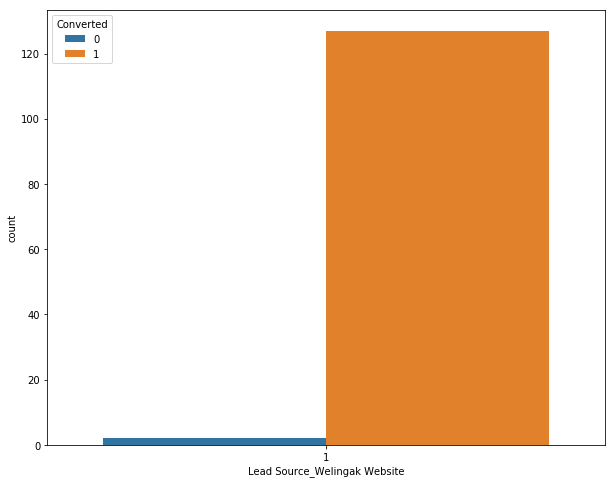

Positive Correlation | Percentage of conversion is  98.44961240310077 %


In [578]:
categorical_vis('Lead Source_Welingak Website')

#### 98% of the people whose lead source was Welingak Website got converted

#### 2)Lead Source_Reference

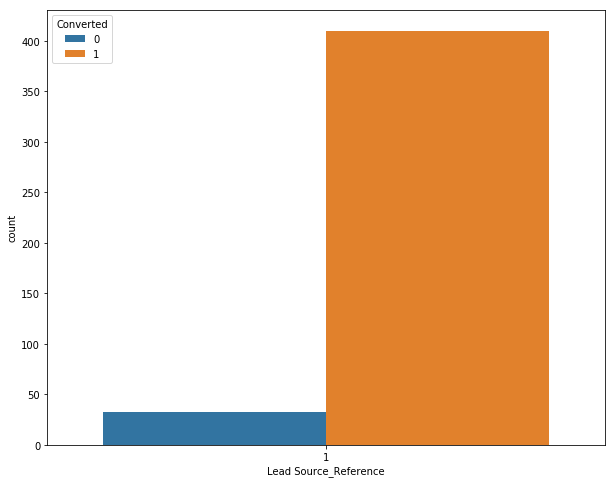

Positive Correlation | Percentage of conversion is  92.55079006772009 %


In [579]:
categorical_vis('Lead Source_Reference')

#### 92% of the people whose lead source was Reference got converted

#### 3)Last Notable Activity_Modified

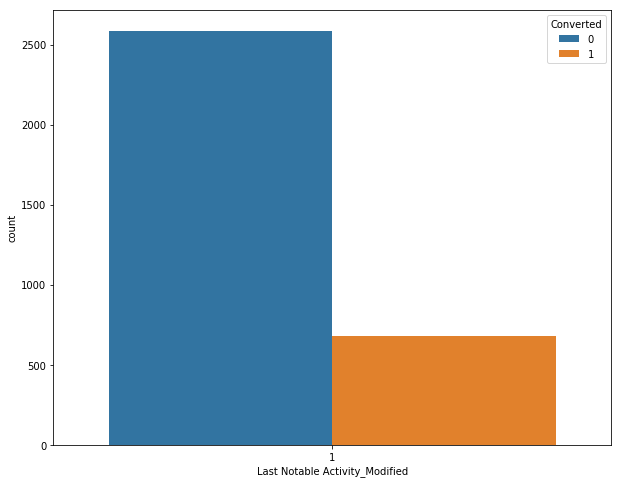

Negative Correlation | Percentage of rejection is  79.18579736761555 %


In [580]:
categorical_vis('Last Notable Activity_Modified',0)

#### Almost 80% of the people whose last notable activity was Modified ended up not converting

#### 4)Last Notable Activity_Email Link Clicked

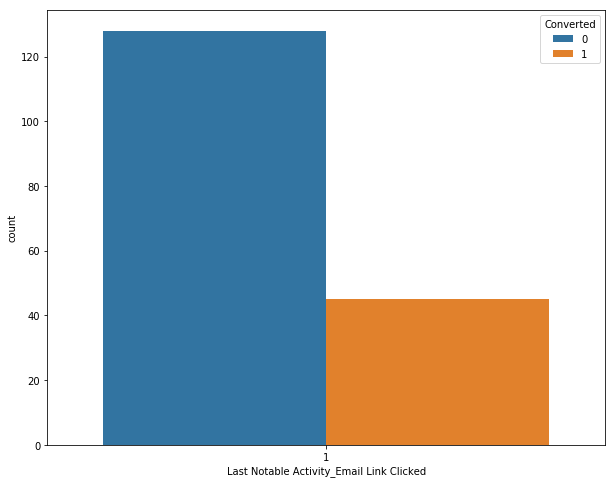

Negative Correlation | Percentage of rejection is  73.98843930635837 %


In [581]:
categorical_vis('Last Notable Activity_Email Link Clicked',0)

#### 73% of the people whose last notable activity was Email Link Clicked ended up not converting

#### 5) Last Notable Activity_Page Visited

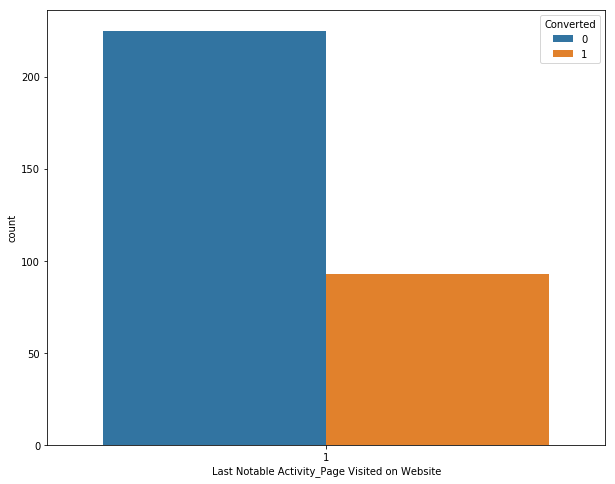

Negative Correlation | Percentage of rejection is  70.75471698113208 %


In [582]:
categorical_vis('Last Notable Activity_Page Visited on Website',0)

#### 70% of the people whose last notable activity was Page Visited on Website ended up not converting

#### 6)Last Activity_Had a Phone Conversation

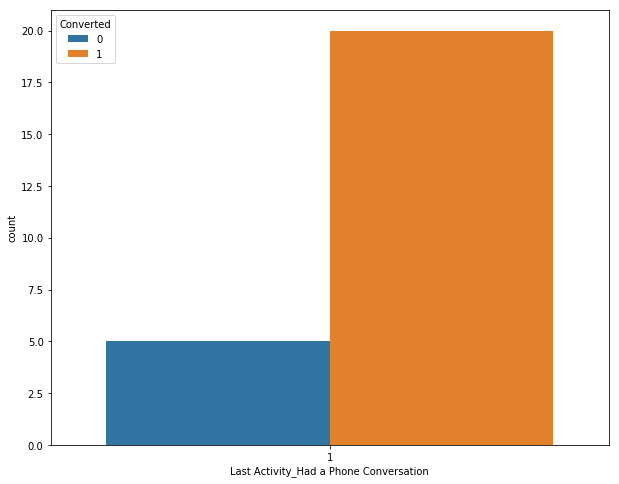

Positive Correlation | Percentage of conversion is  80.0 %


In [583]:
categorical_vis('Last Activity_Had a Phone Conversation')

#### 80 % of the people whose last activity was that they had a phone conversation with the team ended up converting

###  By visualizing the above plots and comparing the Coefficients as calculated by the above Logistic regression model, the variables that are positively affecting the Conversion are:
#### Lead Source_Welingak Website
#### Lead Source_Reference
#### Last Activity_Had a Phone Conversation
#### Total Time Spent on Website

## Model Evaluation | Checking the Accuracy, Sensitivity and Specificity

In [584]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [585]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.3 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Prospect ID,predicted
0,0,0.278253,3009,0
1,0,0.057002,1012,0
2,0,0.115313,9226,0
3,1,0.894470,4750,1
4,1,0.673683,7987,1
5,1,0.809477,1281,1
6,0,0.162665,2880,0
7,1,0.915667,4971,1
8,1,0.858647,7536,1
9,0,0.639493,1248,1


In [586]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2978,  927],
       [ 406, 2040]], dtype=int64)

In [587]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7901117934183594

In [588]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [589]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8340147179067866

In [590]:
# Let us calculate specificity
TN / float(TN+FP)

0.7626120358514725

In [591]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.23738796414852753


In [592]:
# positive predictive value 
print (TP / float(TP+FP))

0.6875631951466128


In [593]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8800236406619385


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [594]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [595]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

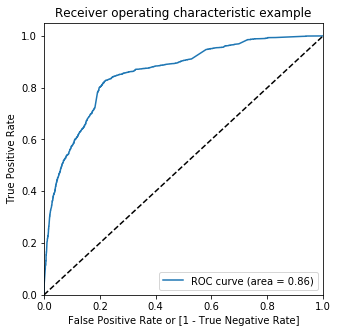

In [596]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [597]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.278253,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.057002,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.115313,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.894470,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.673683,7987,1,1,1,1,1,1,1,1,0,0,0


In [598]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.544796  0.985691  0.268630
0.2   0.2  0.710597  0.882666  0.602817
0.3   0.3  0.790112  0.834015  0.762612
0.4   0.4  0.800976  0.801717  0.800512
0.5   0.5  0.777200  0.647588  0.858387
0.6   0.6  0.771060  0.541701  0.914725
0.7   0.7  0.758463  0.450531  0.951344
0.8   0.8  0.736419  0.364268  0.969526
0.9   0.9  0.687608  0.206460  0.988988


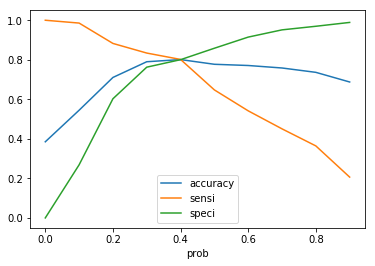

In [599]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [600]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.278253,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.057002,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.115313,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.894470,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.673683,7987,1,1,1,1,1,1,1,1,0,0,0,1


### Assigning Lead score

In [601]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.278253,3009,0,1,1,1,0,0,0,0,0,0,0,0,28
1,0,0.057002,1012,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.115313,9226,0,1,1,0,0,0,0,0,0,0,0,0,12
3,1,0.894470,4750,1,1,1,1,1,1,1,1,1,1,0,1,89
4,1,0.673683,7987,1,1,1,1,1,1,1,1,0,0,0,1,67


#### Creating a function to show accuracy, sensitivity and specificity for a particular Lead Score

In [602]:
def metrics_show(df,val,y=0):
    cutoff_1 = pd.DataFrame( columns = ['Lead Score','Accuracy','Sensitivity','Specificity','False positive rate','Positive Predictive Value','Negative Predictive Value'])
    x1 = df
    x1['final'] = x1.Lead_Score.map( lambda x: 1 if x > val else 0)
    cm1 = metrics.confusion_matrix(x1.Converted, x1.final )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    fpr   = cm1[0,1]/(cm1[0,0]+cm1[0,1])
    ppv   = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    npv   = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    cutoff_1.loc[1] =[val ,accuracy,sensi,speci,fpr,ppv,npv]
    if(y):
        return cutoff_1
    else :
         print(cutoff_1)

In [603]:
metrics_show(y_train_pred_final,40)

   Lead Score  Accuracy  Sensitivity  Specificity  False positive rate  \
1        40.0  0.801764     0.800491     0.802561             0.197439   

   Positive Predictive Value  Negative Predictive Value  
1                   0.717479                   0.865268  


### Precision and recall tradeoff

In [604]:
from sklearn.metrics import precision_recall_curve

In [605]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       1
 10      1
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      1
 20      0
 21      0
 22      0
 23      0
 24      1
 25      

In [606]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

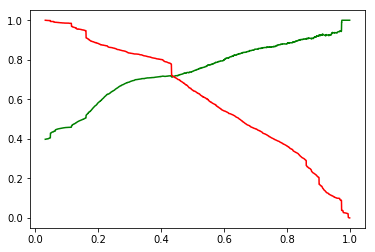

In [607]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [608]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [609]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,0,0,0,0,0,0,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,1,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,1,0,0,0


In [610]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [611]:
y_test_pred = res.predict(X_test_sm)

In [612]:
y_test_pred[:10]

3271    0.202345
1490    0.729708
7936    0.179985
4216    0.861298
3830    0.204323
1800    0.180500
6507    0.488879
4821    0.387910
4223    0.973253
4714    0.115313
dtype: float64

In [613]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [614]:
# Let's see the head
y_pred_1.head()

,0
3271,0.202345
1490,0.729708
7936,0.179985
4216,0.861298
3830,0.204323


In [615]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [616]:
# Putting prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [617]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [618]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [619]:
y_pred_final.head()
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob
0,0,3271,0.202345
1,1,1490,0.729708
2,0,7936,0.179985
3,1,4216,0.861298
4,0,3830,0.204323


In [620]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [621]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score
0,3271,0,0.202345,20
1,1490,1,0.729708,73
2,7936,0,0.179985,18
3,4216,1,0.861298,86
4,3830,0,0.204323,20


In [622]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score
0,3271,0,0.202345,20
1,1490,1,0.729708,73
2,7936,0,0.179985,18
3,4216,1,0.861298,86
4,3830,0,0.204323,20


### Changing with optimum Conversion_Prob > 0.4 , Lead Score >40

In [623]:
y_pred_final_opt = y_pred_final

In [624]:
y_pred_final_opt['final_predicted'] = y_pred_final_opt.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [625]:
y_pred_final_opt.head(10)

,Prospect ID,Converted,Conversion_Prob,Lead_Score,final_predicted
0,3271,0,0.202345,20,0
1,1490,1,0.729708,73,1
2,7936,0,0.179985,18,0
3,4216,1,0.861298,86,1
4,3830,0,0.204323,20,0
5,1800,1,0.180500,18,0
6,6507,0,0.488879,49,1
7,4821,0,0.387910,39,0
8,4223,1,0.973253,97,1
9,4714,0,0.115313,12,0


#### Now lets check the metrics of this model

In [626]:
metrics_show(y_pred_final,40)

   Lead Score  Accuracy  Sensitivity  Specificity  False positive rate  \
1        40.0  0.787734     0.769464     0.798155             0.201845   

   Positive Predictive Value  Negative Predictive Value  
1                   0.684968                   0.858561  


### HOT LEADS = Requirement of atleast 80% Conversion

In [627]:
for i in range(1,101):
    y = len(y_train_pred_final[(y_train_pred_final['Lead_Score']>i) & (y_train_pred_final['Converted']==1)])/len(y_train_pred_final[y_train_pred_final['Lead_Score']>i])
    if(y > 0.8):
        print (i)
        break

60


In [628]:
# Selecting hot leads as per requirement (train data)
Hot_lead = y_train_pred_final.loc[y_train_pred_final['Lead_Score'] > 60]
Hot_lead.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,final
3,1,0.894470,4750,1,1,1,1,1,1,1,1,1,1,0,1,89,1
4,1,0.673683,7987,1,1,1,1,1,1,1,1,0,0,0,1,67,1
5,1,0.809477,1281,1,1,1,1,1,1,1,1,1,1,0,1,81,1
7,1,0.915667,4971,1,1,1,1,1,1,1,1,1,1,1,1,92,1
8,1,0.858647,7536,1,1,1,1,1,1,1,1,1,1,0,1,86,1


In [629]:
# Check for percentage conversion (train data)
converted_train_lead = (sum(Hot_lead['Converted'])/len(Hot_lead['Converted'].index))*100
converted_train_lead

80.62347188264059

In [630]:
# Selecting hot leads as per requirement (test data)
Hot_lead_test = y_pred_final.loc[y_pred_final['Lead_Score'] > 60]
len(Hot_lead_test[Hot_lead_test['Converted']==1])/len(Hot_lead_test)

0.7903726708074534

#### As we can see with score of 60 , the conversion rate increases to around 80% which is what is required.

#### Lets see the difference from optimum value in accuracy, specificity and sensitivity when the  conversion rate is required to be increased to 80%

In [631]:
(metrics_show(y_train_pred_final,60,1).iloc[:,1:4] - metrics_show(y_train_pred_final,40,1).iloc[:,1:4])/metrics_show(y_train_pred_final,40,1).iloc[:,1:4] *100

,Accuracy,Sensitivity,Specificity
1,-3.63315,-32.635342,14.48628


### As we can see, accuracy decreased by 3 %, sensitivity decreased by 32%
### and Specificity increased by 14 % from optimal value selected

## Final Visualisations

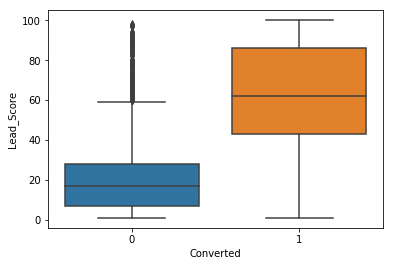

In [632]:
sns.boxplot(y = 'Lead_Score', x = 'Converted', data = y_pred_final)

In [633]:
df1 = y_pred_final
bins = [0, 20, 40, 60, 80, 100]
df1['binned'] = pd.cut(df1['Lead_Score'], bins)

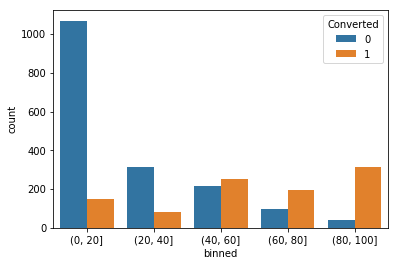

In [634]:
sns.countplot(x = 'binned', hue = 'Converted', data = df1)